# `image_bbox_slicer`

## A Quick Demo

In [1]:
import image_bbox_slicer as ibs

## Configure `Slicer` Object

### Setting Paths To Source And Destination Directories
You can configure paths to source and destination directories like the following. 

By default it takes the current working directory as the source folder for both images and annotations and also creates new folders:
* `/sliced_images` and 
* `/sliced_annotation` 


in the current working directory.

In [2]:
im_src = './src/images'
an_src = './src/annotations'
im_dst = './dst/images'
an_dst = './dst/annotations'

slicer = ibs.Slicer()
slicer.config_dirs(img_src=im_src, ann_src=an_src, 
                   img_dst=im_dst, ann_dst=an_dst)

### Dealing With Partial Labels
<img src="imgs/partial_labels.jpg" alt="Partial Labels Example" style="width: 850px;"/>

The above images show the difference in slicing with and without partial labels. In the image on the left, all the box annotations masked in <span style="color:green">**green**</span> are called Partial Labels. Configure your slicer to either ignore or consider them by setting `Slicer` object's `keep_partial_labels` instance variable to `True` or `False` respectively. By default it is set to `False`.

In [3]:
slicer.keep_partial_labels = True

### Dealing With Empty Tiles
<img src="imgs/empty_tiles.png" alt="Empty Tiles Example" style="width: 850px;"/>

An empty tile is a tile with no "labels" in it. The definition of "labels" here is tightly coupled with the user's preference of partial labels. If you choose to keep the partial labels (i.e. `keep_partial_labels = True`), a tile with a partial label is not treated as empty. If you choose to not keep the partial labels (i.e. `keep_partial_labels = False`), a tile with one or more partial labels is considered empty. Configure your slicer to either ignore or consider empty tiles by setting `Slicer` object's `ignore_empty_tiles` instance variable to `True` or `False` respectively. By default it is set to `True`.  

In [4]:
slicer.ignore_empty_tiles = True

### Storing The Mapping

You can choose to store the mapping between file names of the images before and after slicing by setting the `Slicer` object's `save_before_after_map` instance variable to `True`. By default it is set to `False`.

Typically, `mapper.csv` looks like the following:
```
| old_name   | new_names                       |
|------------|---------------------------------|
| 2102       | 000001, 000002, 000003, 000004  |
| 3931       | 000005, 000005, 000007, 000008  |
| test_image | 000009, 0000102, 000011, 000012 |
| ...        | ...                             |
```

In [5]:
slicer.save_before_after_map = True

## Slicing

### Images and Bounding Box Annotations Simultaneously

#### By Number Of Tiles

Obtained 4 annotation slices!
Successfully saved the mapping between files before and after slicing at ./dst/annotations
Obtained 4 image slices!
Successfully saved the mapping between files before and after slicing at ./dst/images


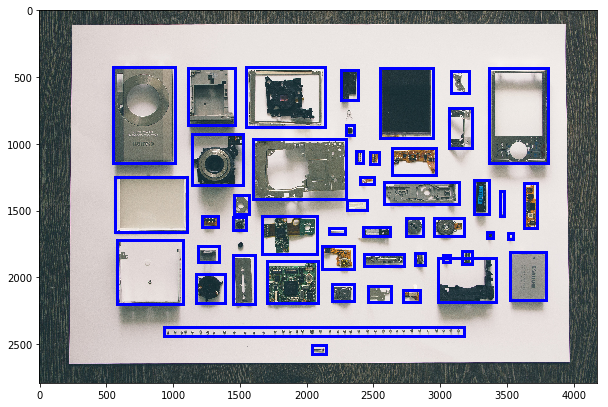

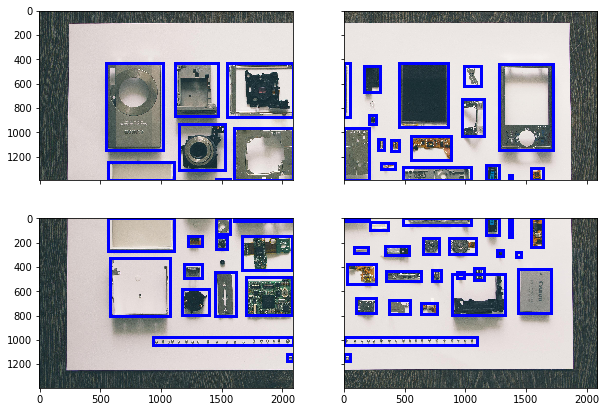

In [6]:
slicer.slice_by_number(number_tiles=4)
slicer.visualize_sliced_random()

#### By Specific Size

Obtained 51 annotation slices!
Successfully saved the mapping between files before and after slicing at ./dst/annotations
Obtained 51 image slices!
Successfully saved the mapping between files before and after slicing at ./dst/images


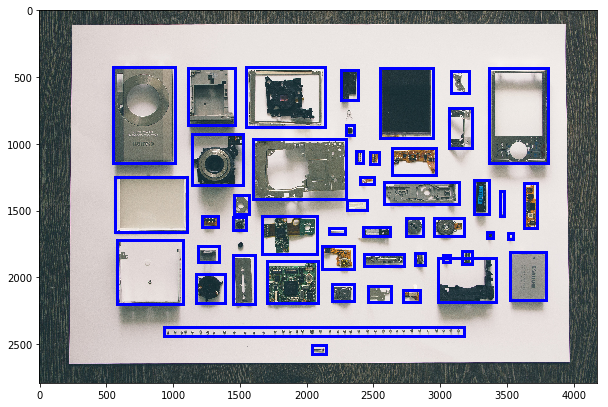

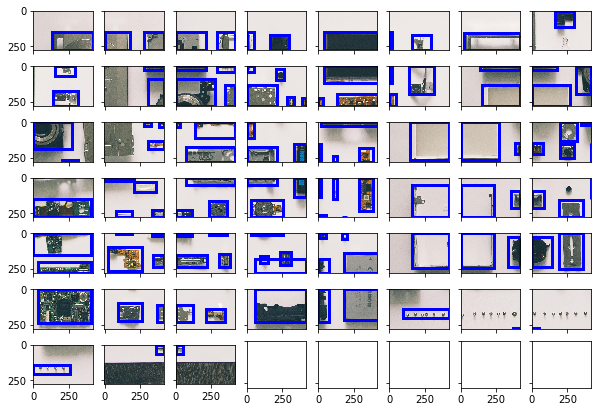

In [7]:
slicer.slice_by_size(tile_size=(418,279), tile_overlap=0)
slicer.visualize_sliced_random()

_Note:_

*`visualize_sliced_random()` randomly picks a recently sliced image from the directory for plotting.*

## Slicing Separately

### Only Images

* #### By Number Of Tiles
`slicer.slice_images_by_number(number_tiles=4)`

* #### By Specific Size
`slicer.slice_images_by_size(tile_size=(418,279), tile_overlap=0)`

###  Only Bounding Box Annotations
* #### By Number Of Tiles
`slicer.slice_bboxes_by_number(number_tiles=4)`

* #### By Specifc Size
`slicer.slice_bboxes_by_size(tile_size=(418,279), tile_overlap=0)`

## Resizing 

### Images and Bounding Box Annotations Simultaneously

#### By Specific Size

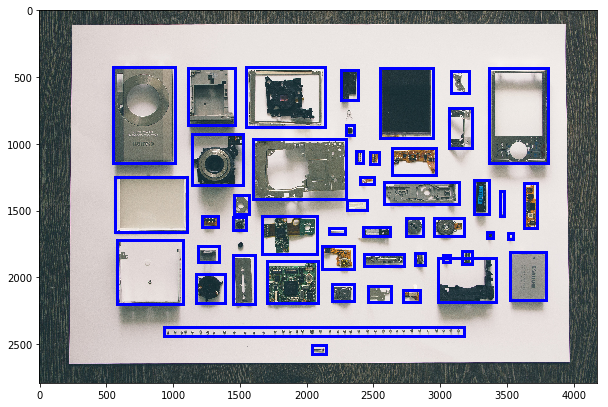

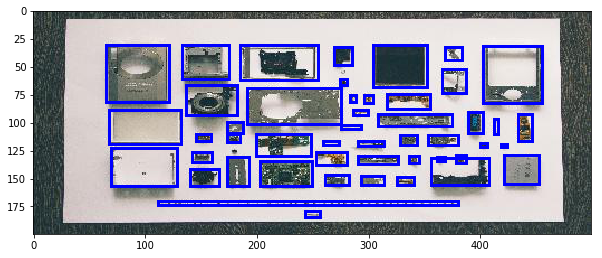

In [8]:
slicer.resize_by_size(new_size=(500,200))
slicer.visualize_resized_random()

#### By A Resize Factor

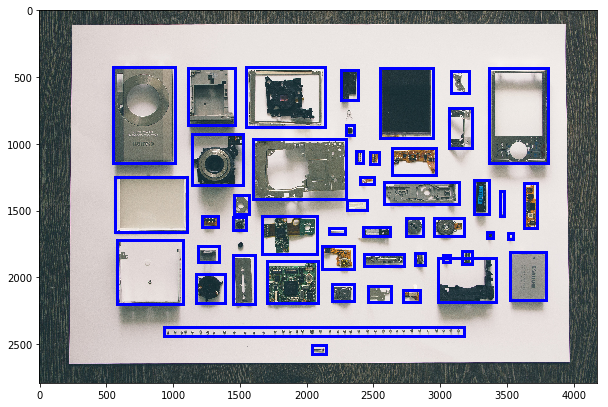

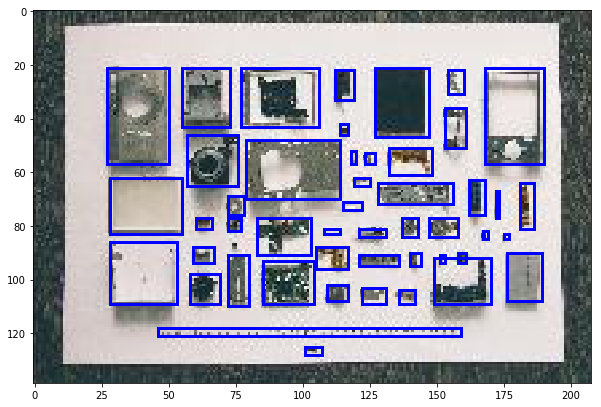

In [9]:
slicer.resize_by_factor(resize_factor=0.05)
slicer.visualize_resized_random()

_Note:_

*`visualize_resized_random()` randomly picks a recently resized image from the destination directory for plotting.*


## Resizing Separately

### Only Images

* #### By Specific Size
`slicer.resize_images_by_size(new_size=(500,200))`

* #### By Resize Factor
`slicer.resize_images_by_factor(resize_factor=0.05)`

###  Only Bounding Box Annotations

* #### By Specific Size
`slicer.resize_bboxes_by_size(new_size=(500,200))`

* #### By Resize Factor
`slicer.resize_bboxes_by_factor(resize_factor=0.05)`